In [2]:
import os
import data_loader
from criteria import PSNR, SSIM, show_img_in_loader_and_comparison, test_psnr_ssim_interpolation
from SRCNN_model import get_SRCNN_model, SSNR_train, test_one_picture_in_val_set, test_one_given_picture
from plot import show_img

###### path define

In [3]:
base_path = r"D:\programming\dataset\DIV2K"
valid_hr = os.path.join(base_path, "DIV2K_valid_HR")
valid_lr = os.path.join(base_path, "my_valid_LR_interpolation")
h5_train_path = os.path.join(base_path, "Y_channel_data_RSCNN")
model_save_path = os.path.join(base_path, "RSCNN.model")

###### data loader

In [4]:
train_dataloader, val_dataloader = data_loader.create_train_val_data_loader(h5_train_path, valid_hr, valid_lr,hr_shrink=6)

###### show one image

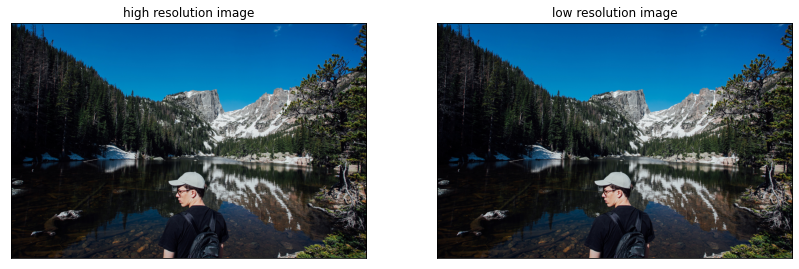

Y channel PSNR value: 28.752
Y channel SSIM value: 0.903


In [5]:
show_img_in_loader_and_comparison(img_number=5, dataloader=val_dataloader)

###### test psnr for interpolation

In [10]:
psnr, ssim = test_psnr_ssim_interpolation(val_dataloader)
print("psnr for interpolation is: {:.3f}".format(psnr))
print("ssim for interpolation is: {:.3f}".format(ssim))

100%|████████████████████████████████████████████████████████████████████████████████| 250/250 [02:01<00:00,  2.05it/s]

psnr for interpolation is: 31.410
ssim for interpolation is: 0.901


###### define net

In [9]:
model, device, current_epoch, PSNR_list, SSIM_list = get_SRCNN_model(model_save_path)

load model parameter
use device:  cuda:0


###### train

In [6]:
SSNR_train(model, device, train_dataloader, val_dataloader, current_epoch, 
           PSNR_list, SSIM_list, model_save_path, max_epoch=81)

100%|███████████████████████████████████████████████████████████████████| 176094/176094 [00:00<00:00, 126753349.68it/s]


#### output the PSNR_list and SSIM_list

In [5]:
for i in range(len(PSNR_list)-10, len(PSNR_list)):
    print("epoch: {}, PSNR: {:.5f}, SSIM: {:.5f}".format(i+1,PSNR_list[i],SSIM_list[i]))

epoch: 72, PSNR: 31.88657, SSIM: 0.90904
epoch: 73, PSNR: 31.88771, SSIM: 0.90906
epoch: 74, PSNR: 31.88877, SSIM: 0.90908
epoch: 75, PSNR: 31.88973, SSIM: 0.90910
epoch: 76, PSNR: 31.89065, SSIM: 0.90912
epoch: 77, PSNR: 31.89156, SSIM: 0.90914
epoch: 78, PSNR: 31.89241, SSIM: 0.90916
epoch: 79, PSNR: 31.89323, SSIM: 0.90917
epoch: 80, PSNR: 31.89393, SSIM: 0.90919
epoch: 81, PSNR: 31.89467, SSIM: 0.90920


#### test for one picture in the validation set

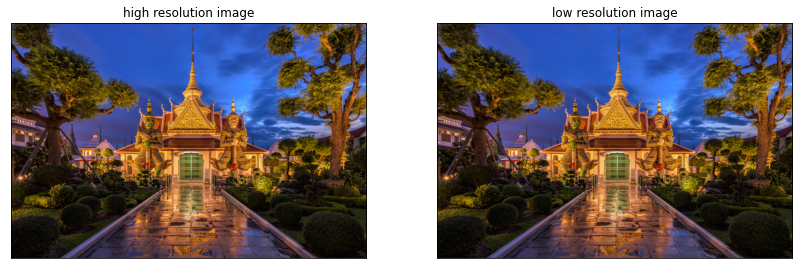

Y channel PSNR value after interpolation: 26.291
Y channel PSNR value after RSCNN: 26.410
Y channel SSIM value after interpolation: 0.808
Y channel SSIM value after RSCNN: 0.822


In [10]:
test_one_picture_in_val_set(model, device, val_dataloader, save_dir="save_img",
                            img_number=2, padding=6)

###### SR for an input image

In [13]:
img_path = r"D:\programming\dataset\test.png"
save_path = r"D:\programming\dataset\test_out.png"
upscale = 3
padding = 6
test_one_given_picture(model, device, img_path, save_path, upscale=upscale, padding=padding)